---
---

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [4]:
# Import Required Libraries

In [5]:
import numpy as np

In [6]:
import tensorflow as tf

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
from tensorflow.keras.datasets import mnist

In [12]:
import dash

In [13]:
from dash import dcc, html

In [14]:
from dash.dependencies import Input, Output

In [15]:
import base64

In [16]:
import io

In [17]:
from PIL import Image

----
---

# Step 1: Load MNIST Dataset

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Step 2: Preprocess Images

In [19]:
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0  # Normalize to [0,1]


In [20]:
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Step 3: One-Hot Encode Labels

In [21]:
y_train = to_categorical(y_train, num_classes=10)

In [22]:
y_test = to_categorical(y_test, num_classes=10)

In [23]:
# Print Shape Confirmations

In [24]:
print(f'Training data shape: {x_train.shape}, Labels shape: {y_train.shape}')
print(f'Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}')


Training data shape: (60000, 784), Labels shape: (60000, 10)
Testing data shape: (10000, 784), Labels shape: (10000, 10)


# Step 4: Define Neural Network Class

In [25]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize Weights and Biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward Propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate=0.1):
        # Compute Error
        error = y - self.a2
        d_output = error * self.sigmoid_derivative(self.a2)

        # Compute Hidden Layer Error
        hidden_error = np.dot(d_output, self.W2.T)
        d_hidden = hidden_error * self.sigmoid_derivative(self.a1)

        # Update Weights and Biases
        self.W2 += np.dot(self.a1.T, d_output) * learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.W1 += np.dot(X.T, d_hidden) * learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate


# Step 5: Train the Neural Network

In [26]:
nn = NeuralNetwork(input_size=784, hidden_size=128, output_size=10)

In [27]:
epochs = 50

In [28]:
for epoch in range(epochs):
    output = nn.forward(x_train)
    nn.backward(x_train, y_train, learning_rate=0.1)
    if epoch % 10 == 0:
        loss = np.mean((y_train - output) ** 2)
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 0, Loss: 0.2485
Epoch 10, Loss: 0.1000
Epoch 20, Loss: 0.1000
Epoch 30, Loss: 0.1000
Epoch 40, Loss: 0.1000


# Step 6: Model Evaluation

In [29]:
predictions = nn.forward(x_test)

In [30]:
predicted_labels = np.argmax(predictions, axis=1)

In [31]:
true_labels = np.argmax(y_test, axis=1)

In [32]:
accuracy = np.mean(predicted_labels == true_labels)

In [33]:
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 9.80%


# Step 7: Save the Model

In [34]:
np.savez('mnist_model.npz', W1=nn.W1, W2=nn.W2, b1=nn.b1, b2=nn.b2)

# Step 8: Load the Model

In [35]:
def load_model():
    data = np.load('mnist_model.npz')
    nn.W1 = data['W1']
    nn.W2 = data['W2']
    nn.b1 = data['b1']
    nn.b2 = data['b2']

# Step 9: Visualize Predictions and Results

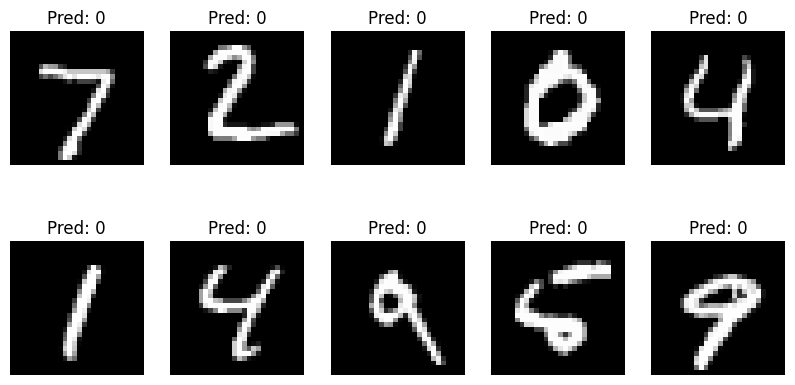

In [36]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Pred: {predicted_labels[i]}')
    axes[i].axis('off')
plt.show()

# Step 10: Confusion Matrix

In [37]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

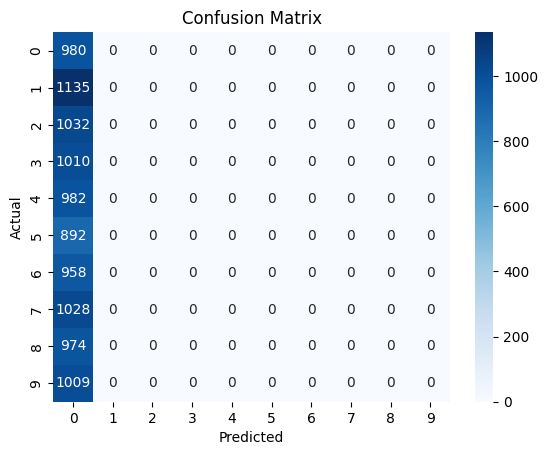

In [38]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Interactive Dashboard with Dash

In [39]:
app = dash.Dash(__name__)

In [40]:
server = app.server

In [41]:
app.layout = html.Div([
    html.H1("MNIST Digit Classifier"),
    dcc.Upload(
        id='upload-image',
        children=html.Button('Upload Image'),
        multiple=False
    ),
    html.Div(id='output-image-upload'),
    html.H3("Prediction: "),
    html.Div(id='prediction-output')
])

In [42]:
# Image Preprocessing Function

In [43]:
def preprocess_image(contents):
    content_string = contents.split(',')[1]
    decoded = base64.b64decode(content_string)
    image = Image.open(io.BytesIO(decoded)).convert('L')
    image = image.resize((28, 28))
    image_array = np.array(image).reshape(1, 784) / 255.0
    return image_array


In [44]:
# Callback Function for Upload and Prediction

In [45]:
@app.callback(
    [Output('output-image-upload', 'children'),
     Output('prediction-output', 'children')],
    [Input('upload-image', 'contents')]
)
def update_output(contents):
    if contents is None:
        return None, "No image uploaded"

    image_array = preprocess_image(contents)
    prediction = nn.forward(image_array)
    predicted_digit = np.argmax(prediction)

    return html.Img(src=contents, style={'height': '100px'}), f'Predicted Digit: {predicted_digit}'


In [46]:
# Run the Dash App

In [47]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>